## Języki skryptowe w analizie danych
### Projekt 1, język Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'sustainable_fashion_trends_2024.csv')

## Analiza bazy danych

Baza składa się z 5000 rekordów i 15 kolumn:
- **Brand_ID** - numer id danej marki
- **Brand_Name** - nazwa marki
- **Country** - kraj, z którego dana marka pochodzi
- **Year** - rok zebrania danych o danej marce
- **Sustainability_Rating** - ocena zrównoważonego rozwoju danej marki
- **Material_Type** - materiały, z których zostały wykonane produkty
- **Eco_Friendly_Manufacturing** - czy dana marka produkuje w sposób ekologiczny
- **Carbon_Footprint_MT** - ilość śladu węglowego w megatonach
- **Water_Usage_Liters** - ilość zużycia wody w litrach
- **Waste_Production_KG** - ilość produkcji odpadów w kilogramach
- **Product_Lines** - numery linii produktów
- **Average_Price_USD** - średnia cena produktu w dolarach amerykańskich
- **Market_Trend** - trend rynkowy danej marki
- **Certifications** - certyfikat, jaki marka otrzymała

In [3]:
df.shape

(5000, 15)

In [4]:
df.head()

,Brand_ID,Brand_Name,Country,Year,Sustainability_Rating,Material_Type,Eco_Friendly_Manufacturing,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Recycling_Programs,Product_Lines,Average_Price_USD,Market_Trend,Certifications
0,BRAND-0001,Brand_1,Australia,2018,D,Tencel,No,1.75,4511152.79,97844.11,No,2,38.33,Growing,GOTS
1,BRAND-0002,Brand_2,Japan,2015,D,Vegan Leather,Yes,124.39,1951566.31,37267.75,No,15,250.07,Growing,GOTS
2,BRAND-0003,Brand_3,USA,2024,A,Vegan Leather,No,336.66,467454.52,38385.92,No,2,146.16,Growing,B Corp
3,BRAND-0004,Brand_4,Italy,2023,D,Bamboo Fabric,No,152.04,899576.90,32665.45,No,13,165.52,Stable,OEKO-TEX
4,BRAND-0005,Brand_5,USA,2016,D,Bamboo Fabric,Yes,415.63,1809219.90,37295.47,Yes,19,211.63,Stable,Fair Trade


In [5]:
df = df.sort_values(by='Year', ascending=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 2162 to 4181
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Brand_ID                    5000 non-null   object 
 1   Brand_Name                  5000 non-null   object 
 2   Country                     5000 non-null   object 
 3   Year                        5000 non-null   int64  
 4   Sustainability_Rating       5000 non-null   object 
 5   Material_Type               5000 non-null   object 
 6   Eco_Friendly_Manufacturing  5000 non-null   object 
 7   Carbon_Footprint_MT         5000 non-null   float64
 8   Water_Usage_Liters          5000 non-null   float64
 9   Waste_Production_KG         5000 non-null   float64
 10  Recycling_Programs          5000 non-null   object 
 11  Product_Lines               5000 non-null   int64  
 12  Average_Price_USD           5000 non-null   float64
 13  Market_Trend                5000 no

In [7]:
df.isna().sum()

Brand_ID                         0
Brand_Name                       0
Country                          0
Year                             0
Sustainability_Rating            0
Material_Type                    0
Eco_Friendly_Manufacturing       0
Carbon_Footprint_MT              0
Water_Usage_Liters               0
Waste_Production_KG              0
Recycling_Programs               0
Product_Lines                    0
Average_Price_USD                0
Market_Trend                     0
Certifications                1004
dtype: int64

In [8]:
df = df.dropna()

In [9]:
duplicated_rows = df.duplicated()
duplicated_rows[duplicated_rows == True].sum()

0

In [10]:
numeric_cols = ['Year', 'Carbon_Footprint_MT', 'Water_Usage_Liters', 'Waste_Production_KG', 'Product_Lines', 'Average_Price_USD']
df[numeric_cols].describe()

,Year,Carbon_Footprint_MT,Water_Usage_Liters,Waste_Production_KG,Product_Lines,Average_Price_USD
count,3996.000000,3996.000000,3.996000e+03,3996.000000,3996.000000,3996.000000
mean,2016.972472,251.072262,2.548778e+06,50325.347608,10.375375,259.748381
std,4.358266,143.659410,1.425991e+06,28837.490969,5.690977,137.590915
min,2010.000000,1.040000,5.010618e+04,1026.380000,1.000000,20.020000
25%,2013.000000,126.465000,1.325365e+06,25371.390000,5.000000,143.110000
50%,2017.000000,252.350000,2.547554e+06,50683.125000,10.000000,259.270000
75%,2021.000000,375.752500,3.791823e+06,75279.962500,15.000000,378.510000
max,2024.000000,499.930000,4.999597e+06,99947.850000,20.000000,499.870000


## Wizualizacja głównych wartości

In [11]:
PALETTE = "crest"

In [12]:
sns.set_palette(PALETTE)

In [13]:
countries = df['Country'].value_counts()

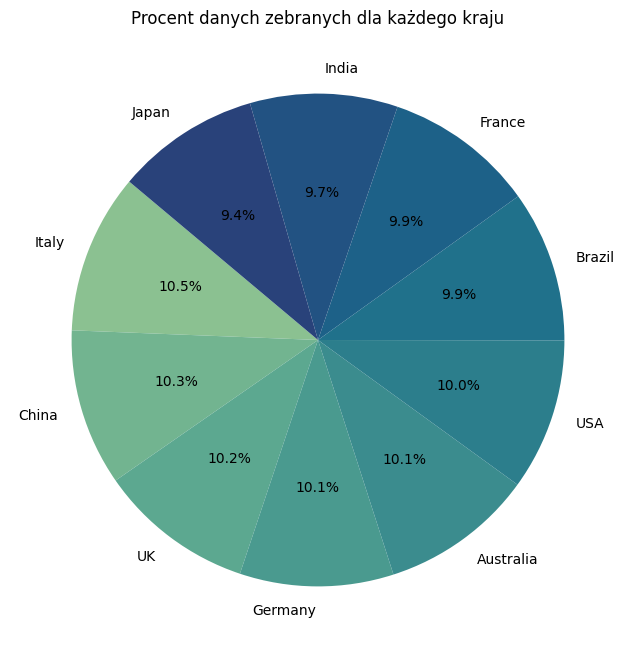

In [14]:
colors = sns.color_palette(PALETTE, 10)
plt.figure(figsize=(8, 8))
plt.pie(countries, labels=countries.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Procent danych zebranych dla każdego kraju')
plt.show()

Najmniej danych zostało zebranych w Japonii, natomiast najwięcej we Włoszech. Różnice są jednak nieznaczne, ponieważ różnica między procentem największej ilości danych, a najmniejszej wynosi jedynie 0.9 punkta procentowego.

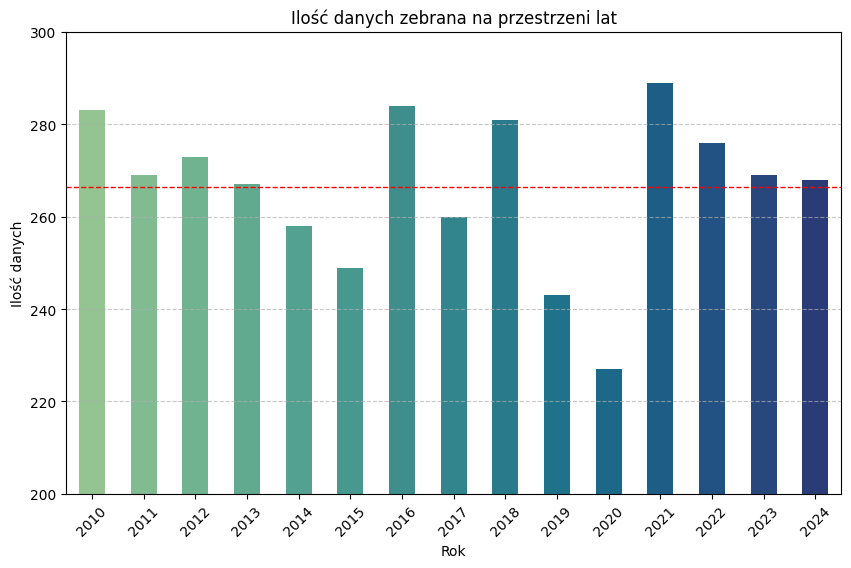

In [15]:
plt.figure(figsize=(10, 6))

df['Year'].value_counts().sort_index().plot(kind='bar', color=sns.color_palette(PALETTE, n_colors=15))

mean_value = df['Year'].value_counts().mean()
plt.axhline(mean_value, color='red', linestyle='--', linewidth=1, label=f'Mean: {mean_value:.2f}')

plt.title('Ilość danych zebrana na przestrzeni lat')
plt.xlabel('Rok')
plt.ylabel('Ilość danych')
plt.ylim(200,300)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

W latach 2010-2013, 2016, 2018, 2021-2024 zebrano ilość danych większą niż średnia, przy czym największą ilość danych zebrano w 2021 roku. Natomiast w latach 2014, 2015, 2017, 2019, 2020 zebrano ilość danych mniejszą niż średnia, a najmniejszą ilość danych zebrano w 2020 roku. Wartość najbliżej średniej przypada na rok 2014.

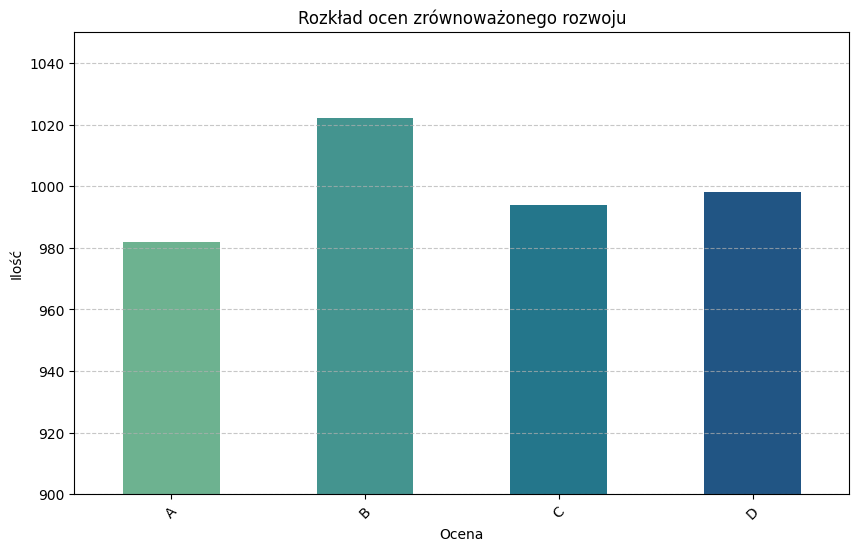

In [16]:
plt.figure(figsize=(10, 6))
df['Sustainability_Rating'].value_counts().sort_index().plot(kind='bar', color=sns.color_palette(PALETTE, n_colors=4))
plt.title('Rozkład ocen zrównoważonego rozwoju')
plt.xlabel('Ocena')
plt.ylabel('Ilość')
plt.ylim(900,1050)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Największa ilość marek posiada sustainability rating B, natomiast najmniej może pochwalić się ratingiem A.

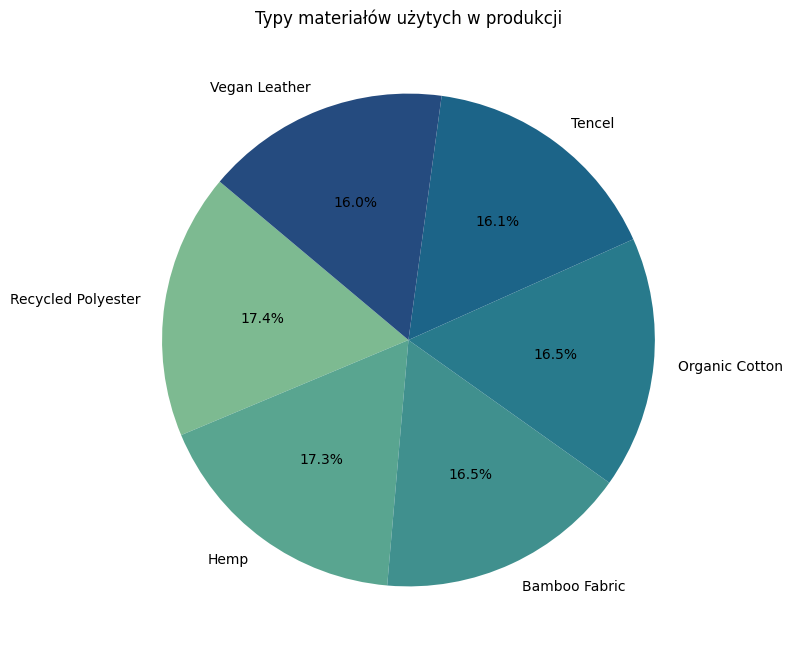

In [17]:
material = df['Material_Type'].value_counts()
colors = sns.color_palette(PALETTE, 6)
plt.figure(figsize=(8, 8))
plt.pie(material, labels=material.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Typy materiałów użytych w produkcji')
plt.show()

Zebrane dane pokazują, że największa ilość odzieży została wyprodukowana z recyklinowanego poliestru, natomiast najrzadziej pojawiała się wegańska skóra.

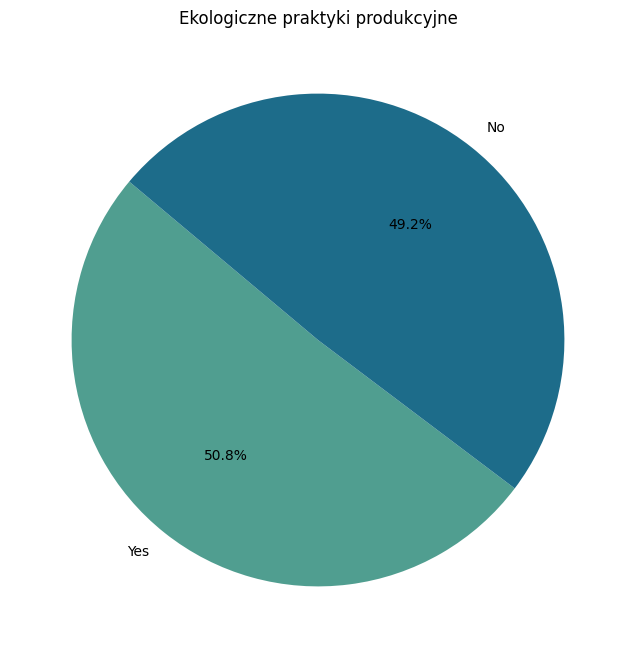

In [18]:
manufacturing = df['Eco_Friendly_Manufacturing'].value_counts()
colors = sns.color_palette(PALETTE, 2)
plt.figure(figsize=(8, 8))
plt.pie(manufacturing, labels=manufacturing.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Ekologiczne praktyki produkcyjne')
plt.show()

Z danych wynika, że 50.8% marek wytwarzało swoje produkty w sposób przyjazny dla środowiska.

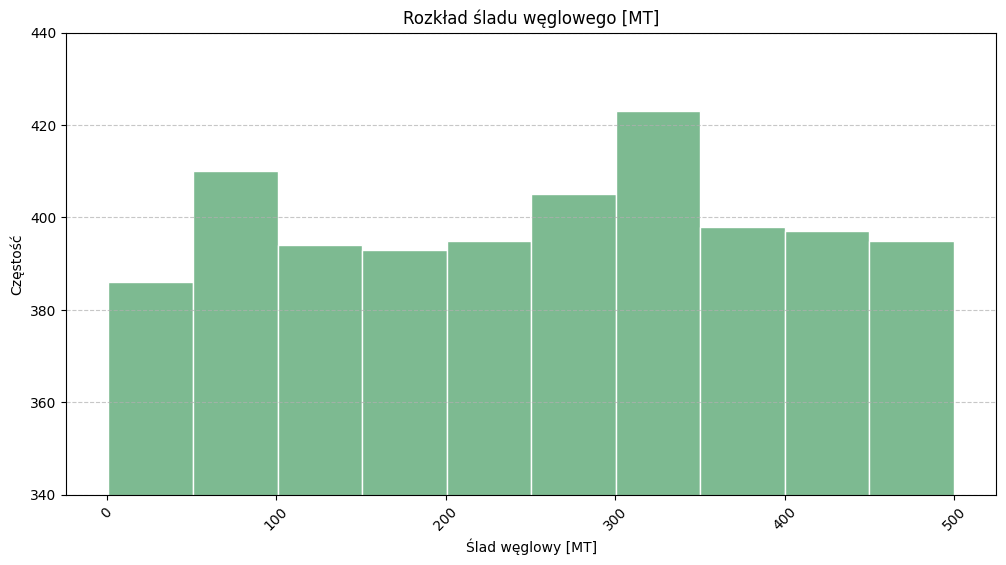

In [19]:
plt.figure(figsize=(12, 6))
df['Carbon_Footprint_MT'].plot(kind='hist', edgecolor='white')
plt.title('Rozkład śladu węglowego [MT]')
plt.xlabel('Ślad węglowy [MT]')
plt.ylabel('Częstość')
plt.ylim(340,440)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Najczęstszy ślad węglowy analizowanych marek to 300 - 350 MT, natomiast najrzadziej spotykany jest najmniejszy ślad węglowy - poniżej 50 MT.

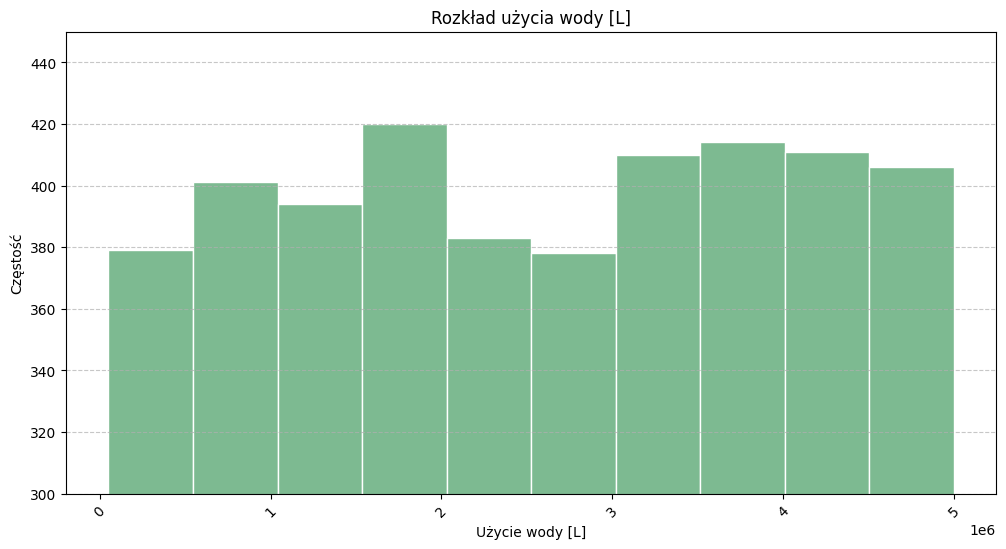

In [20]:
plt.figure(figsize=(12, 6))
df['Water_Usage_Liters'].plot(kind='hist', edgecolor='white')
plt.title('Rozkład użycia wody [L]')
plt.xlabel('Użycie wody [L]')
plt.ylabel('Częstość')
plt.ylim(300,450)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Najczęstsze zużycie wody to 1.5 - 2 litrów. Najrzadziej zużywana ilość wody to 2.5 - 3 litrów.

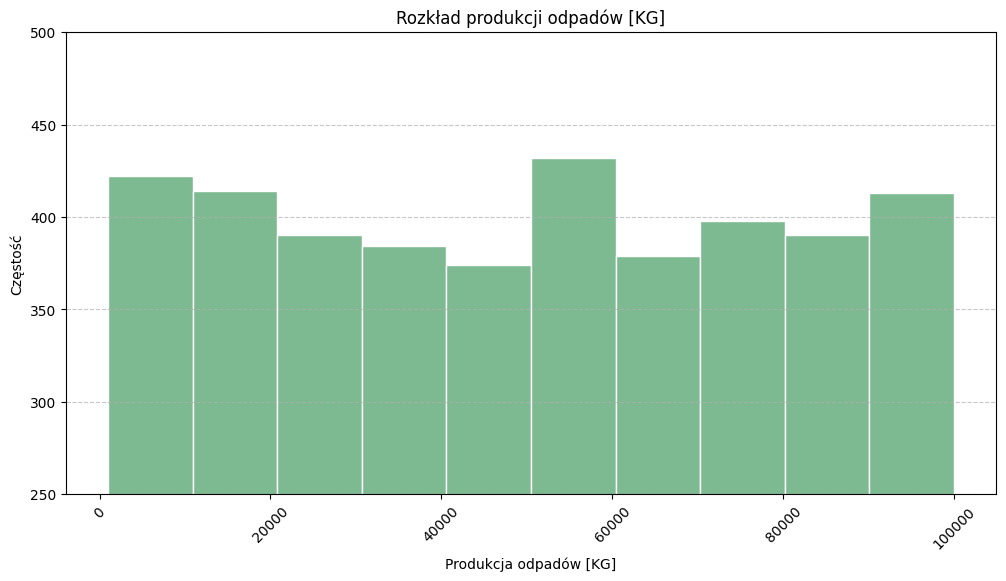

In [21]:
plt.figure(figsize=(12, 6))
df['Waste_Production_KG'].plot(kind='hist', edgecolor='white')
plt.title('Rozkład produkcji odpadów [KG]')
plt.xlabel('Produkcja odpadów [KG]')
plt.ylabel('Częstość')
plt.ylim(250,500)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Najczęściej produkowana ilość odpadów to 50000 - 60000 kg. Jest to środkowa wartość.

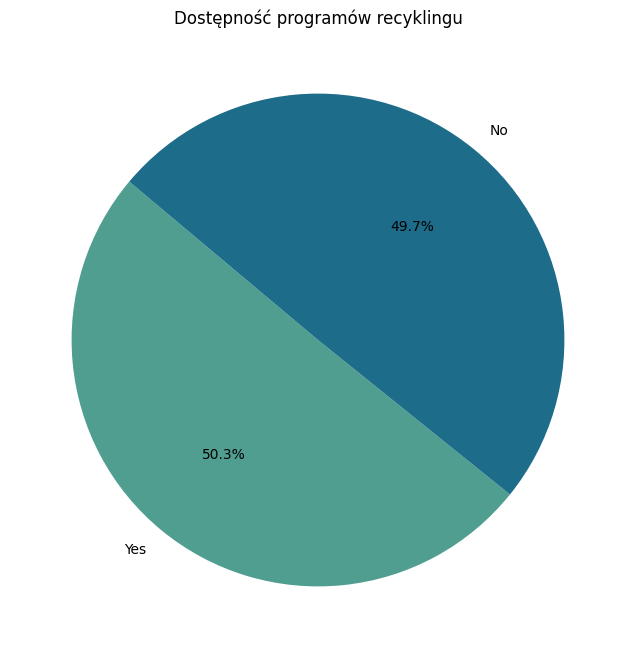

In [22]:
manufacturing = df['Recycling_Programs'].value_counts()
colors = sns.color_palette(PALETTE, 2)
plt.figure(figsize=(8, 8))
plt.pie(manufacturing, labels=manufacturing.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Dostępność programów recyklingu')
plt.show()

50.3 % marek ma dostępne programy recyklingowe.

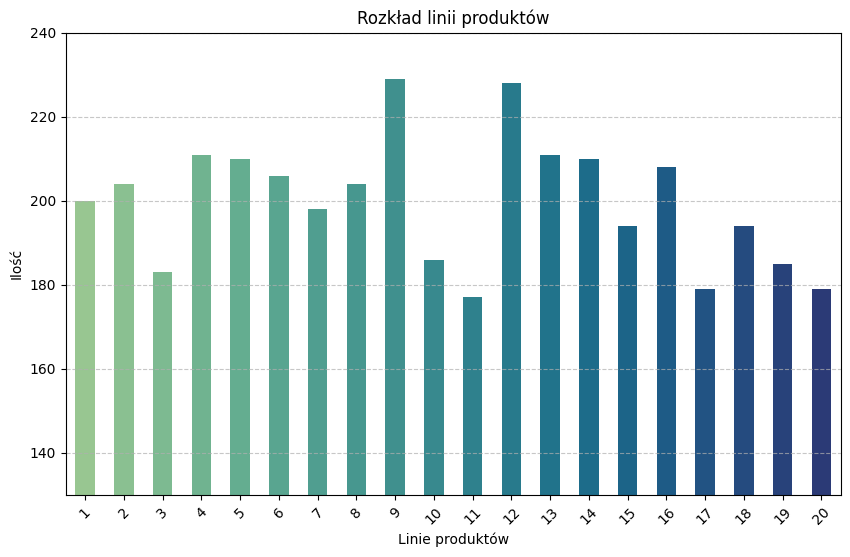

In [23]:
plt.figure(figsize=(10, 6))
df['Product_Lines'].value_counts().sort_index().plot(kind='bar', color=sns.color_palette(PALETTE, n_colors=20))
plt.title('Rozkład linii produktów')
plt.xlabel('Linie produktów')
plt.ylabel('Ilość')
plt.ylim(130,240)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Linie produktów 9 oraz 10 są najczęsciej reprezentowane, natomiast linia 11 najmniej. Może to oznaczać, że linie 9 i 10 obejmują najbardziej popularne produkty, a linia 11 te bardziej niszowe, skierowane do węższej grupy konsumentów.

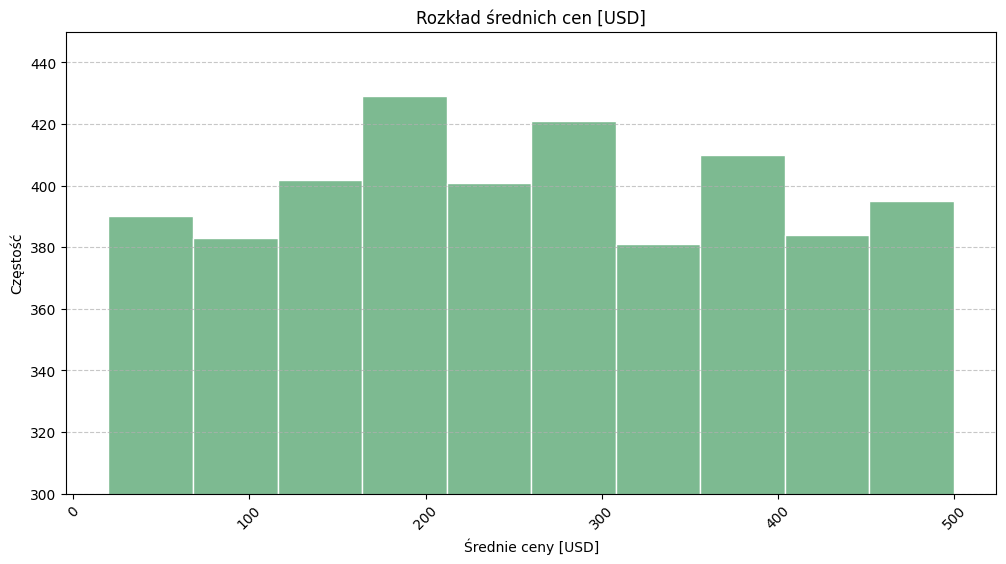

In [24]:
plt.figure(figsize=(12, 6))
df['Average_Price_USD'].plot(kind='hist', edgecolor='white')
plt.title('Rozkład średnich cen [USD]')
plt.xlabel('Średnie ceny [USD]')
plt.ylabel('Częstość')
plt.ylim(300,450)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

W danych możemy zauwazyć umiarkowaną różnorodność cen, jednak najczęściej występującą cena wynosi około 200 USD.

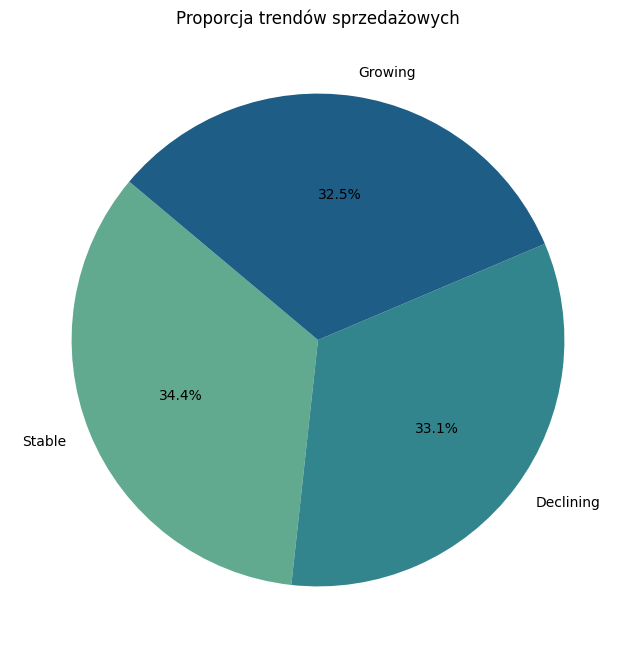

In [25]:
market = df['Market_Trend'].value_counts()
colors = sns.color_palette(PALETTE, 3)
plt.figure(figsize=(8, 8))
plt.pie(market, labels=market.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Proporcja trendów sprzedażowych')
plt.show()

Z danych wynika, że największa ilość trendów sprzedażowych jest stabilna.

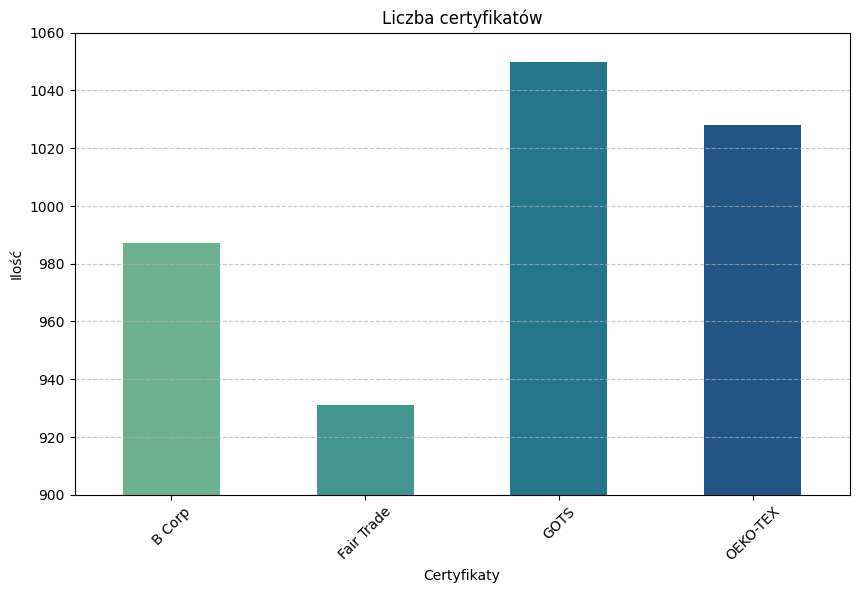

In [26]:
plt.figure(figsize=(10, 6))
df['Certifications'].value_counts().sort_index().plot(kind='bar', color=sns.color_palette(PALETTE, n_colors=4))
plt.title('Liczba certyfikatów')
plt.xlabel('Certyfikaty')
plt.ylabel('Ilość')
plt.ylim(900,1060)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Najwięcej marek może pochwalić się certyfikatem takim jak GOTS, a najrzadziej spotykany certyfikat to Fair Trade. Różnica między ilością tych certyfikatów to ponad 50.

## Wizualizacja zależności między wartościami

C:\Users\zuzia\AppData\Local\Temp\ipykernel_28464\852028285.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sustainability_Rating', y='Average_Price_USD', palette=PALETTE)


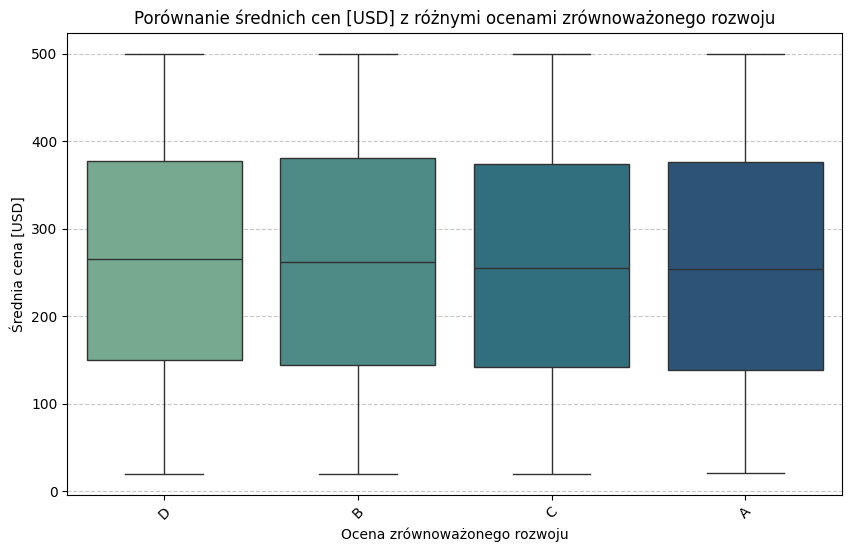

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sustainability_Rating', y='Average_Price_USD', palette=PALETTE)
plt.title('Porównanie średnich cen [USD] z różnymi ocenami zrównoważonego rozwoju')
plt.xlabel('Ocena zrównoważonego rozwoju')
plt.xticks(rotation=45)
plt.ylabel('Średnia cena [USD]')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Na wykresie możemy zaobserwować, że średnie ceny produktów są bardzo podobne we wszystkich grupach ocen zrównoważonego rozwoju (D, A, B, C), a mediany cen oscylują w przedziale 250-300 USD. Zakresy cen oraz rozkład danych są zbliżone, co sugeruje, że poziom zrównoważenia nie ma istotnego wpływu na kształtowanie cen produktów.

C:\Users\zuzia\AppData\Local\Temp\ipykernel_28464\1069610676.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Material_Type', y='Carbon_Footprint_MT', palette=PALETTE)


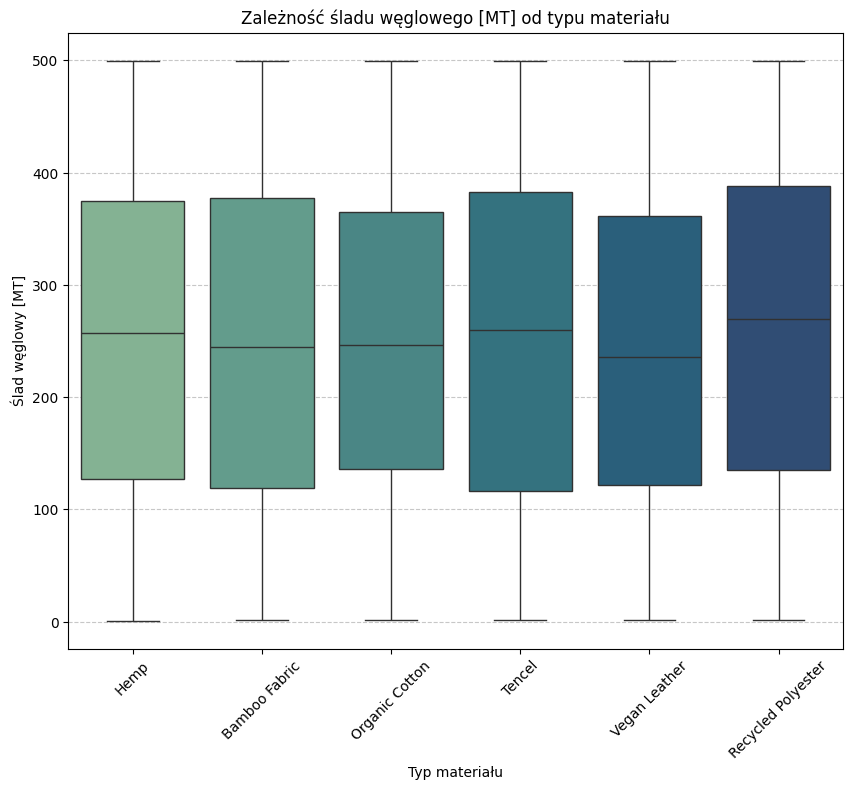

In [28]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='Material_Type', y='Carbon_Footprint_MT', palette=PALETTE)
plt.title('Zależność śladu węglowego [MT] od typu materiału')
plt.xlabel('Typ materiału')
plt.xticks(rotation=45)
plt.ylabel('Ślad węglowy [MT]')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Wykres pokazuje, że ślad węglowy jest zbliżony dla wszystkich typów materiałów, z medianą oscylującą wokół 250 MT oraz podobnym zakresem rozkładu danych. Brak wyraźnych różnic sugeruje nam, że materiały mają porównywalny wpływ środowiskowy pod względem emisji CO2.

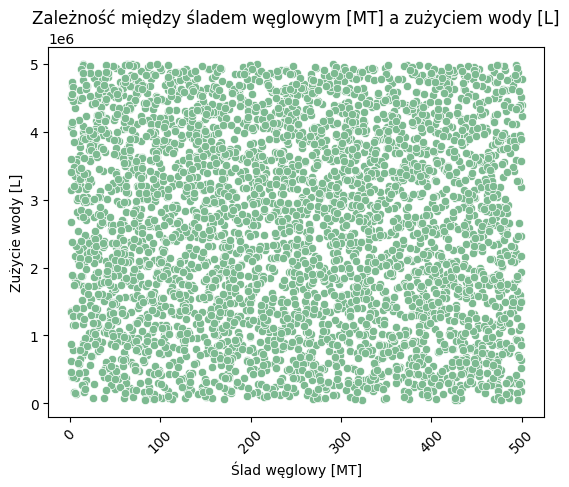

In [29]:
sns.scatterplot(x='Carbon_Footprint_MT', y='Water_Usage_Liters', data=df)
plt.title('Zależność między śladem węglowym [MT] a zużyciem wody [L]')
plt.xlabel('Ślad węglowy [MT]')
plt.ylabel('Zużycie wody [L]')
plt.xticks(rotation = 45)
plt.show()

Punkty na wykresie są rozproszone w sposób losowy co sugeruje nam, że nie ma istotnej korelacji między zużyciem wody, a śladem węglowym.

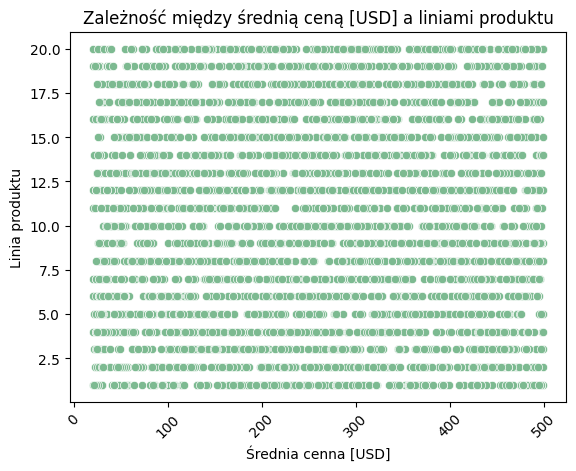

In [30]:
sns.scatterplot(x='Average_Price_USD', y='Product_Lines', data=df)
plt.title('Zależność między średnią ceną [USD] a liniami produktu')
plt.xlabel('Średnia cenna [USD]')
plt.ylabel('Linia produktu')
plt.xticks(rotation = 45)
plt.show()

Punkty są równomiernie rozproszone wzdłuż osi, co sugeruje nam, że linie produktów mają pdobny zakres cen, a cena nie jest ściśle powiązana z konkretną linią.

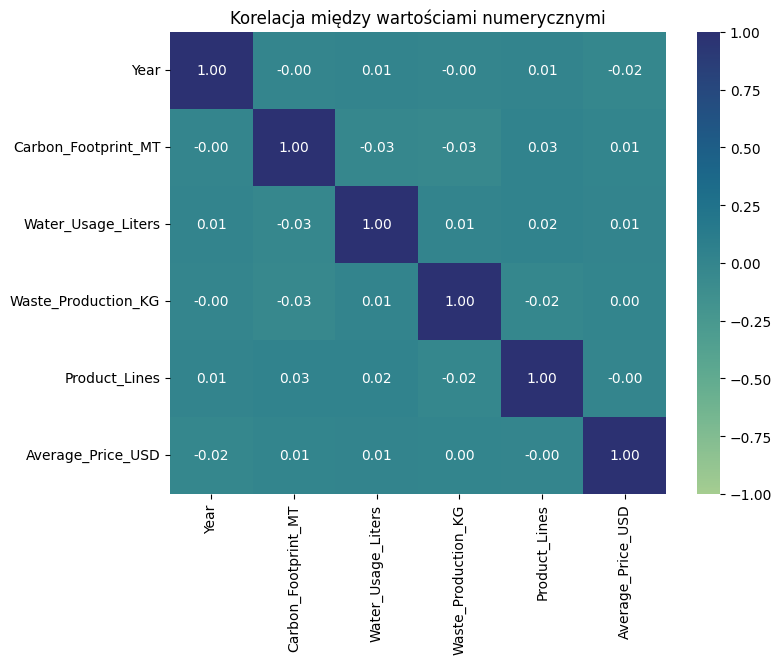

In [31]:
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap=PALETTE, vmin=-1, vmax=1, fmt='.2f', cbar=True)
plt.title('Korelacja między wartościami numerycznymi')
plt.show()

Możemy zaobserwować, że nie występuje silna korelacja między żadnymi zmiennymi.

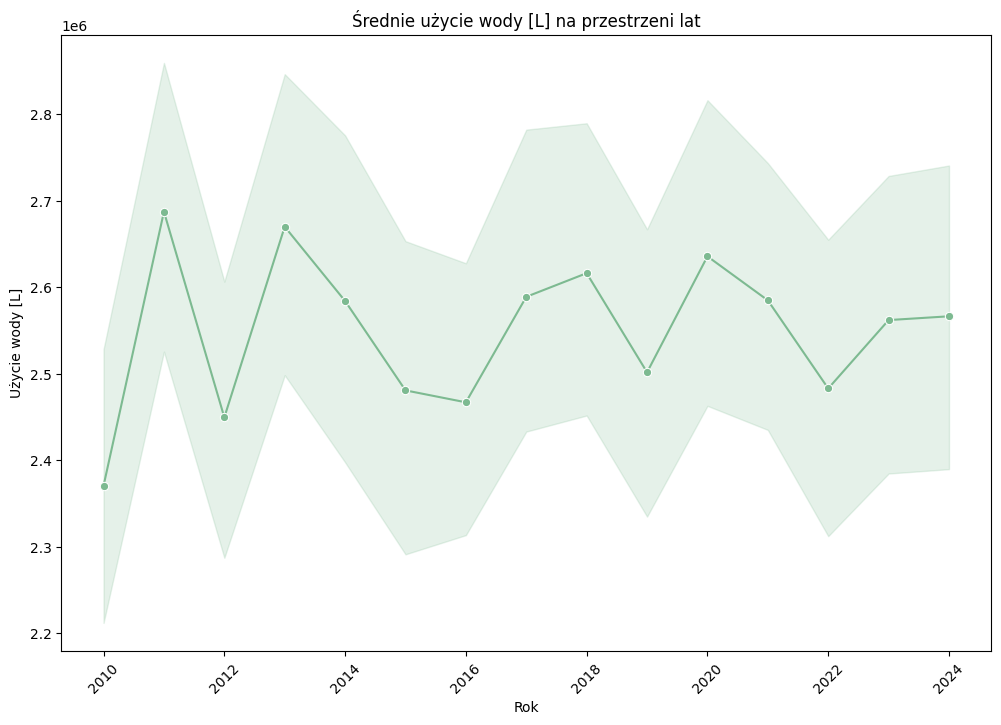

In [32]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Year', y='Water_Usage_Liters', marker='o')
plt.title('Średnie użycie wody [L] na przestrzeni lat')
plt.xlabel('Rok')
plt.ylabel('Użycie wody [L]')
plt.xticks(rotation=45)
plt.show()

Największy wzrost w zużyciu wody w czasie produkcji miał miejsce w latach 2010-2011, a zaraz po nim nastąpił bardzo duży spadek w latach 2011-2012. Od roku 2013 do 2016 obserwujemy spadek, po którym następuje ponownie wzrost, aż do roku 2018, gdzie widzimy kolejny spadek. W latach 2023-2024 zużycie wody jest na prawie równym poziomie.

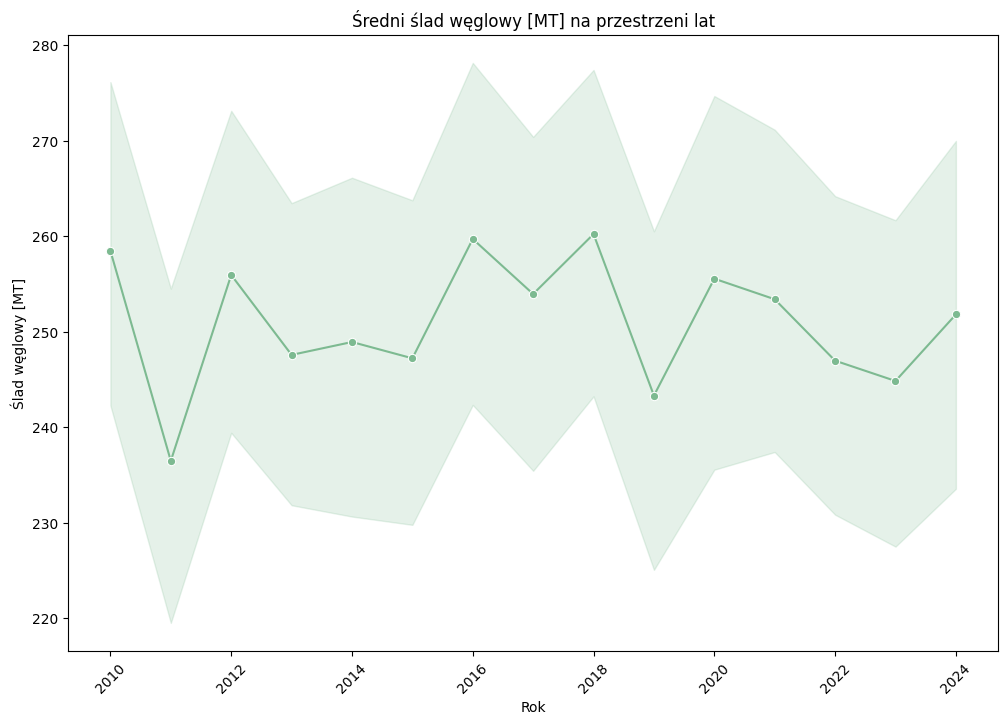

In [33]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Year', y='Carbon_Footprint_MT', marker='o')
plt.title('Średni ślad węglowy [MT] na przestrzeni lat')
plt.xlabel('Rok')
plt.xticks(rotation=45)
plt.ylabel('Ślad węglowy [MT]')
plt.show()

Możemy zaobserwować duży spadek i duży wzrost w latach 2010-2012, w latach 2013-2015 ślad węglowy utrzymuje się na podobnym poziomie, aż do wzrostu w 2016, roku od roku 2020 obserwujemy lekki spadek, aż do roku 2024, gdzie następuje niewielki wzrost.

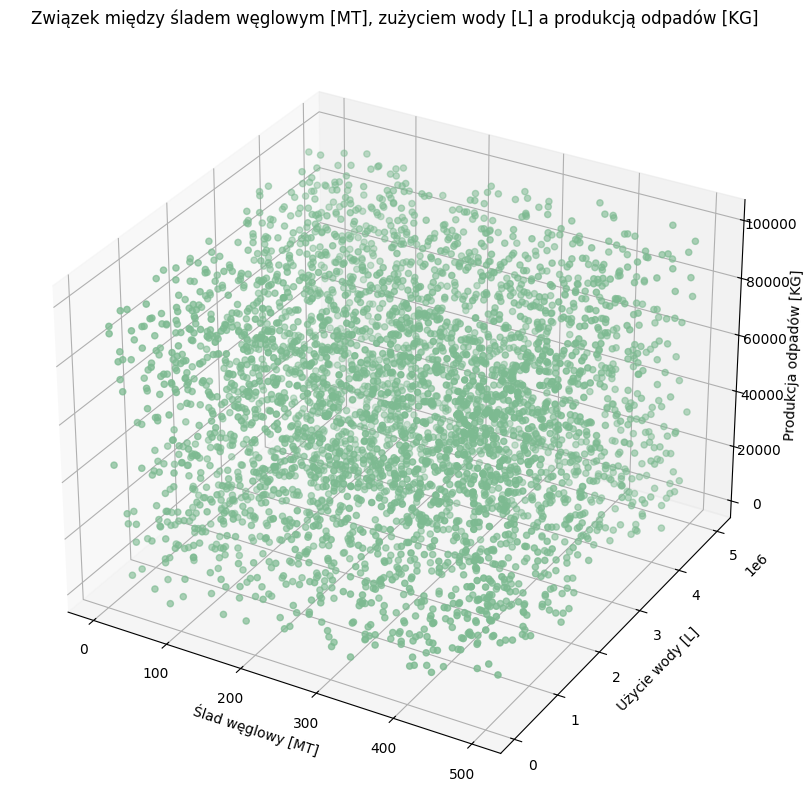

In [34]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Carbon_Footprint_MT'], df['Water_Usage_Liters'], df['Waste_Production_KG'], marker='o')
ax.set_xlabel('Ślad węglowy [MT]')
ax.set_ylabel('Użycie wody [L]')
ax.set_zlabel('Produkcja odpadów [KG]')
ax.set_title('Związek między śladem węglowym [MT], zużyciem wody [L] a produkcją odpadów [KG]')
plt.show()

Wykres pokazuje, że dane dotyczące śladu węglowego, zużycia wody i produkcji odpadów są rozproszone, bez wyraźnego wzorca lub korelacji między tymi trzema zmiennymi.

C:\Users\zuzia\AppData\Local\Temp\ipykernel_28464\3011783308.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Material_Type', y='Average_Price_USD', data=df, palette=PALETTE)


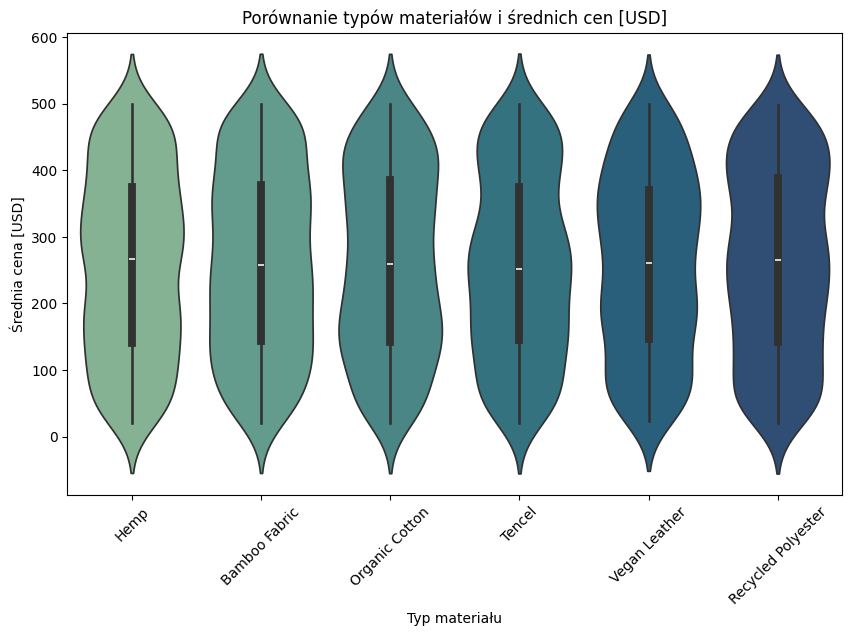

In [35]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Material_Type', y='Average_Price_USD', data=df, palette=PALETTE)
plt.title('Porównanie typów materiałów i średnich cen [USD]')
plt.xlabel('Typ materiału')
plt.xticks(rotation=45)
plt.ylabel('Średnia cena [USD]')
plt.show()

Wykres pokazuje, że ceny produktów z różnych materiałów są zbliżone, a ich rozkłady różnią się nieznacznie. Większość materiałów jak tencel, materiał bambusowy czy poliester z recyklingu, ma podobny średni poziom cen (200–300 USD), natomiast materiały konopne i bawełna organiczna wykazują trochę większe zróżnicowanie cen.

### Podsumowanie

Dane zebrane w bazie rozłożone są w sposób bardzo równomierny, bez znaczących odchyłów lub dużych różnic między kategoriami, co może być spowodowane zbyt małą ilością zebranych danych lub ograniczoną różnorodnością próby. Ma to wpływ na jakość analizy oraz ogranicza to przydatność tych danych w algorytmach klasyfikacji.